In [17]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import models, layers, optimizers

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/compresive_strength_concrete.csv")

In [26]:
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [27]:
data.shape

(1030, 9)

In [28]:
data.isnull().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


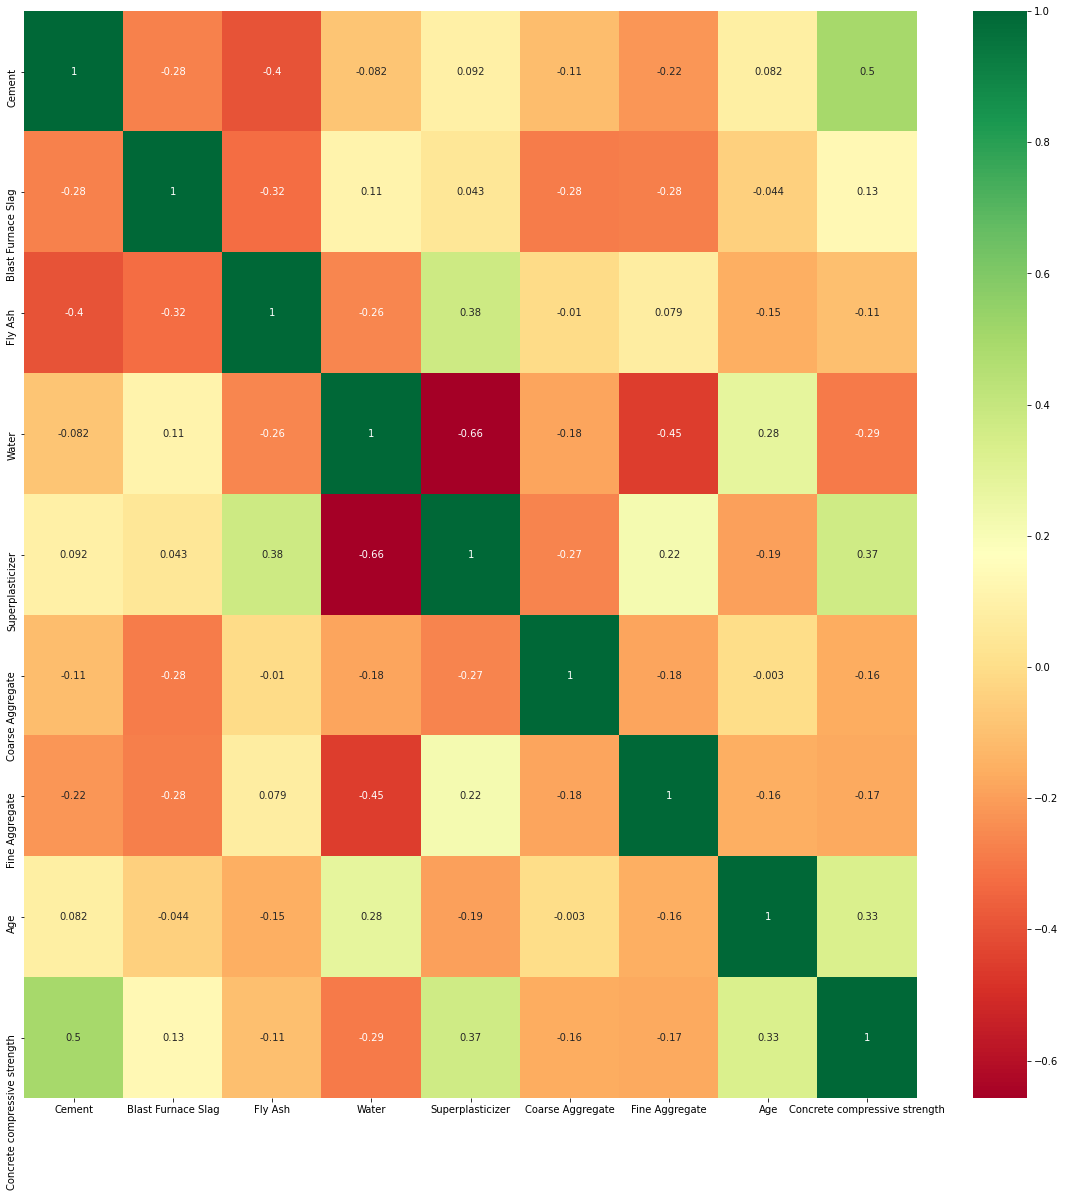

In [30]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [31]:
data.shape

(1030, 9)

In [32]:
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [35]:
x = data.drop(['Concrete compressive strength'], axis=1, inplace=False)
y = data['Concrete compressive strength']

In [36]:
x.shape

(1030, 8)

In [37]:
y.shape

(1030,)

In [38]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, Y_test = train_test_split(x, y, train_size = 0.5, test_size = 0.5, random_state=100)
x_valid, x_test, y_valid, y_test = train_test_split(X_test, Y_test, test_size = 0.3, random_state=100)

In [39]:
y_train[0]

79.99

In [41]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(10, activation='relu', input_shape=(x_train.shape[1],)))
  model.add(layers.Dense(8, activation='relu'))
  model.add(layers.Dense(6))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [42]:
k = 4
num_val_samples = len(x_train) // k
num_epochs = 100
all_mae_histories = []
all_scores = []
for i in range(k):
  print('processing fold #', i)
  val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate( [x_train[:i * num_val_samples], x_train[(i + 1) * num_val_samples:]], axis=0)
  partial_train_targets = np.concatenate( [y_train[:i * num_val_samples], y_train[(i + 1) * num_val_samples:]], axis=0)
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)
  mae_history = history.history['mae']
  all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [44]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
print('All fold Validation Error: ', all_scores)
print('Mean of all fold Validation Error: ', np.mean(all_scores))
print('average_mae_history: ', average_mae_history)

All fold Validation Error:  [6.423924922943115, 5.579041957855225, 5.407973766326904, 8.171642303466797]
Mean of all fold Validation Error:  6.39564573764801
average_mae_history:  [40.87642431259155, 20.501685857772827, 14.700941801071167, 11.831895589828491, 10.840830564498901, 10.188796281814575, 9.844273328781128, 9.46790623664856, 9.226773977279663, 8.975300550460815, 8.82183313369751, 8.754319548606873, 8.584131717681885, 8.494789838790894, 8.390491843223572, 8.385282516479492, 8.295049786567688, 8.183507204055786, 8.129818201065063, 8.05307388305664, 8.063117146492004, 7.9652099609375, 8.039482951164246, 7.963060975074768, 7.949920892715454, 7.921416878700256, 7.851583480834961, 7.897245526313782, 7.863792419433594, 7.825718998908997, 7.764888763427734, 7.684834957122803, 7.6938886642456055, 7.672975778579712, 7.600969910621643, 7.559250235557556, 7.627916097640991, 7.58180844783783, 7.522152781486511, 7.600159406661987, 7.594043612480164, 7.537584543228149, 7.482808828353882, 7.

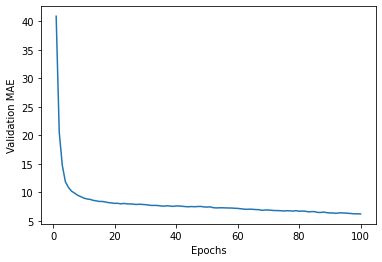

In [45]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

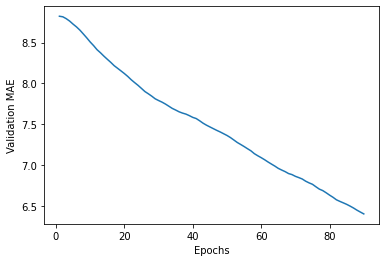

In [46]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [47]:
model = build_model()
model.fit(x_train, y_train, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(x_test, y_test)
print(test_mae_score)

5/5 [==============================] - 0s 3ms/step - loss: 76.0146 - mae: 6.6839
6.683910369873047
